In [4]:
%reload_ext autoreload
%autoreload 2 
%pylab osx
from astropy import constants as c
from astropy import units as u
G = c.G.to(u.AU**3 / u.M_sun / u.day**2).value

Populating the interactive namespace from numpy and matplotlib


## Test if delta pomega is invarient 

In [5]:
import ktwo19.conversion     
reload(ktwo19.conversion)
from astropy import constants as c

# Jupiter
t = -0.06266423

e = 0.0484007
a = 5.20332
Omega = 1.754667 # p51 MD (radians)
inc = 0.022783 # p51 MD (radians) (radians)
pomega = 0.25724756910994823 # p51 MD
E = 3.2997020305279596 # p51 MD
omega = pomega - Omega 
msys = (c.M_sun + c.M_jup).to(u.Msun).value
per = sqrt(4 * pi**2 / G / msys * a**3) # Kepler's third law
f = 2 * np.arctan(np.sqrt((1+e)/(1-e))*tan(E/2)) # true anomally


kep1 = a, e, inc, Omega, omega, f
kep2 = a, e, inc, Omega, omega + 0.5*pi/2, f

car1 = ktwo19.conversion.keplerian_to_cartesian(*((per,)+kep1))
car2 = ktwo19.conversion.keplerian_to_cartesian(*((per,)+kep2))

rcar1 = ktwo19.conversion.rotate_cartesian(car1,pi/2,0,0)
rcar1 = ktwo19.conversion.rotate_cartesian(rcar1,-pi/2,0,0)
rcar2 = ktwo19.conversion.rotate_cartesian(car2,-pi/2,-pi/2,-pi/2)

rkep1 = ktwo19.conversion.cartesian_to_keplerian(rcar1, msys)
rkep2 = ktwo19.conversion.cartesian_to_keplerian(rcar2, msys)
def print_keplerian(kep):
    s = ""
    s+="a={:f}, e={:f}, inc={:f}, Omega={:f}, omega={:f}, f={:f} ".format( *kep)
    s+="pomega={:f}".format(kep[3]+kep[4])
    print s

    
print_keplerian(kep1)
#print_keplerian(kep2)

print_keplerian(rkep1)
#print_keplerian(rkep2)

a=5.203320, e=0.048401, inc=0.022783, Omega=1.754667, omega=-1.497419, f=-2.990930 pomega=0.257248
a=5.204636, e=0.048139, inc=0.022783, Omega=1.754667, omega=4.784899, f=-2.990063 pomega=6.539566


## Is delta pomega conserved under rotation

In [34]:
Omega = np.deg2rad(100.535) # p51 MD
inc = np.deg2rad(1.30537) # p51 MD
pomega = np.deg2rad(14.7392) # p51 MD
omega = pomega - Omega 
E = np.deg2rad(189.059) # p51 MD
msys = (c.M_sun + c.M_jup).to(u.Msun).value
e = 0.0484007
a = 5.20332
per = sqrt(4 * pi**2 / G / msys * a**3) # Kepler's third law
f = 2 * np.arctan(np.sqrt((1+e)/(1-e)) * tan(E/2) ) # true anomally

kep1 = a, e, inc, Omega, omega, f
kep2 = a, e, inc+0.4, Omega + 0.5*pi/2, omega + 0.5*pi/2, f

car1 = ktwo19.conversion.keplerian_to_cartesian(*((per,)+kep1))
car2 = ktwo19.conversion.keplerian_to_cartesian(*((per,)+kep2))

rcar1 = ktwo19.conversion.rotate_cartesian(car1,0,0,1)
rcar2 = ktwo19.conversion.rotate_cartesian(car2,0,0,1)


rkep1 = ktwo19.conversion.cartesian_to_keplerian(rcar1, msys)
rkep2 = ktwo19.conversion.cartesian_to_keplerian(rcar2, msys)
def print_keplerian(kep):
    s = ""
    s+="a={:f}, e={:f}, inc={:f}, Omega={:f}, omega={:f}, f={:f} ".format( *kep)
    s+="pomega={:f}".format(kep[3]+kep[4])
    print s

print_keplerian(kep1)
print_keplerian(kep2)
print_keplerian(rkep1)
print_keplerian(rkep2)

dpomega = (kep1[3]+kep1[4]) - (kep2[3]+kep2[4])
rdpomega = (rkep1[3]+rkep1[4]) - (rkep2[3]+rkep2[4])

domega = kep1[4] -kep2[4]
rdomega = rkep1[4] - rkep2[4]


print domega,rdomega
print dpomega,rdpomega

a=5.203320, e=0.048401, inc=0.022783, Omega=1.754667, omega=-1.497419, f=-2.990930 pomega=0.257248
a=5.203320, e=0.048401, inc=0.422783, Omega=2.540065, omega=-0.712021, f=-2.990930 pomega=1.828044
a=5.204636, e=0.048139, inc=0.022783, Omega=2.754667, omega=4.784899, f=-2.990063 pomega=7.539566
a=5.204636, e=0.048139, inc=0.422783, Omega=-2.743120, omega=5.570297, f=-2.990063 pomega=2.827177
-0.785398163397 -0.785398163397
-1.57079632679 4.71238898039


In [30]:
kep1[3]-kep2[3]

-0.78539816339744806

In [29]:
rkep1[3] - rkep2[3]

5.4977871437821388

In [18]:
%pylab osx

import rebound
import numpy as np
from astropy import constants as c
import radvel.orbit
import ktwo19.io
from matplotlib import pylab as plt
import ktwo19.conversion
def setupSimulation(i):
    df = ktwo19.io.load_table('photodyn-samples',cache=2)
    row = df.iloc[i]
    sim = rebound.Simulation()
    t0 = 2020.0 

    print row['a2 e2 incrad2 Omegarad2 w2 tp2'.split()]
    for i in range(1,4):
        a = row['a%i' %i]
        e = row['e%i' %i]
        inc = row['incrad%i' %i]

        Omega = row['Omegarad%i' %i]
        omega = row['w%i' %i]
        per = row['per%i' %i]
        tp = row['tp%i' %i]
        f = ktwo19.conversion.compute_true_anomaly(t0, per, a, e, tp)

        car = ktwo19.conversion.keplerian_to_cartesian(per, a, e, inc, Omega, omega, f)
        rcar = ktwo19.conversion.rotate_cartesian(car,-pi/2,0,0)
        msys = 4 * pi**2 * a**3 / per**2 / G
        a, e, inc, Omega, omega, f = ktwo19.conversion.cartesian_to_keplerian(rcar, msys)
 
        row.loc['a%i' %i] = a
        row.loc['e%i' %i] =  e
        row.loc['incrad%i' %i] = inc
        row.loc['Omegarad%i' %i] = Omega
        row.loc['w%i' %i] = omega
    print row['a2 e2 incrad2 Omegarad2 w2 tp2'.split()]
    sim.t = t0
    sim.G = 2.9591220363e-4 # in Msun-AU-day units
    sim.integrator = "ias15" 
    Mstar = row['Mstar']
    sim.add(m=Mstar)
    
    # Add K2-19b
    m = row.masse2 * c.M_earth / c.M_sun # Solar masses
    P = row.per2
    e = row.e2
    omega = row.w2
    Omega = row.Omegarad2
#    inc = pi - row.incrad2
    inc = row.incrad2
    T = row.tp2 # Time of periastron
    sim.add(m=m, P=P, e=e, omega=omega, Omega=Omega, inc=inc, T=T)

    # Add K2-19c
    m = row.masse3 * c.M_earth / c.M_sun # Solar masses
    P = row.per3
    e = row.e3
    omega = row.w3
    Omega = row.Omegarad3 
    inc = row.incrad3
    T = row.tp3 # Time of periastron
    sim.add(m=m, P=P, e=e, omega=omega, Omega=Omega, inc=inc, T=T)
    sim.move_to_com()
    return sim

def run_simulation(irow):
    sim = setupSimulation(irow)
    sim.status()
    sim.exit_min_distance = 0.01
    sim.automateSimulationArchive("archive.bin",interval=10,deletefile=True)
    tstart = sim.t
    tstop = tstart + 30000
    dt_out = 1

    times = np.arange(tstart, tstop, dt_out)

    ps = sim.particles # ps is now an array of pointers. It will update as the simulation runs.
    t_print = tstart
    t_since_print = 0
    t_print_step = 10000
    df = []
    try:
        for i, time in enumerate(times):
            d = {}
            sim.integrate(time, exact_finish_time=0)
            for element in 'P a e M n omega pomega Omega inc l'.split():
                
                for i_planet,s_planet in zip([1,2],'bc'):
                    d["%s_%s" % (element,s_planet)] = getattr(ps[i_planet],element)
                dp = ps[1] - ps[2]   # Calculates the coponentwise difference between particles
                d['dist'] = np.sqrt(dp.x*dp.x + dp.y*dp.y + dp.z*dp.z)

            d['time'] =time
            df.append(d)
            if t_since_print > t_print_step:
                t_print = time
                t_since_print = 0
                print time
            else:
                t_since_print = time - t_print

    except rebound.Encounter as error:
        print(error)

    df = pd.DataFrame(df)
    return df 

df = run_simulation(3)

Populating the interactive namespace from numpy and matplotlib
writing table photodyn-samples to cache
a2              0.075178
e2              0.178566
incrad2         1.597806
Omegarad2       0.000000
w2             -1.694048
tp2          2031.644783
Name: 3, dtype: float64


/Users/petigura/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


a2           7.519263e-02
e2           1.783398e-01
incrad2      2.700934e-02
Omegarad2    1.422308e-17
w2           4.588929e+00
tp2          2.031645e+03
Name: 3, dtype: float64
---------------------------------
REBOUND version:     	3.6.6
REBOUND built on:    	Aug 21 2018 09:37:11
Number of particles: 	3
Selected integrator: 	ias15
Simulation time:     	2.0200000000000000e+03
Current timestep:    	0.001000
---------------------------------
<rebound.Particle object, m=0.903066707684 x=1.13859110711e-07 y=-1.42890813616e-05 z=-3.52250676086e-07 vx=7.1296450306e-06 vy=2.34559404714e-07 vz=1.92659212801e-07>
<rebound.Particle object, m=9.93754130041e-05 x=-0.000956473925384 y=0.0883605215951 z=0.00238717340321 vx=-0.0498603404777 vy=-0.0019854503883 vz=-5.3452420385e-05>
<rebound.Particle object, m=3.49772980871e-05 x=-0.000222212157949 y=0.117880183998 z=0.00231234314539 vx=-0.0424176027992 vy=-0.000415064565572 vz=-0.00482233545419>
---------------------------------
12022.0
22024.0


In [22]:
from cycler import cycler
new_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728',
              '#9467bd', '#8c564b', '#e377c2', '#7f7f7f',
              '#bcbd22', '#17becf']

mpl.rcParams['axes.prop_cycle'] = cycler(color=new_colors)


,close all
fig,axL = subplots(nrows=2,sharex=True)
sca(axL[0])

d = {
   r'$4 \lambda_b - 6 \lambda_c + 2 \varpi_c$':'4 * l_b - 6 * l_c + 2 * pomega_c',
   r'$4 \lambda_b - 6 \lambda_c + 2 \varpi_b$':'4 * l_b - 6 * l_c + 2 * pomega_b',
   r'$2 \lambda_b - 3 \lambda_c + \varpi_c$':'2 * l_b - 3 * l_c + pomega_c',
   r'$2 \lambda_b - 3 \lambda_c + \varpi_b$':'2 * l_b - 3 * l_c + pomega_b',
   r'$2 \lambda_b - 3 \lambda_c + \varpi_b$':'2 * l_b - 3 * l_c + pomega_b',
   r'dist':'dist'
}
k = r'$4 \lambda_b - 6 \lambda_c + 2 \varpi_c$'
#k = r'$4 \lambda_b - 6 \lambda_c + 2 \varpi_b$'
#k = r'$2 \lambda_b - 3 \lambda_c + \varpi_c$'
#k = r'$2 \lambda_b - 3 \lambda_c + \varpi_b$'

fig,axL = subplots(nrows=2,sharex=True)
sca(axL[0])
_eval = d[k]
plot(df.time,np.mod(df.eval(_eval),2*pi))
grid()
xlabel('time')
ylabel(k)
sca(axL[1])
#plot(df.time,df.pomega_b)
grid()

#plot(df.time,df.omega_b)
#plot(df.time,df.Omega_b)
plot(df.time,df.inc_b,label=r'$i_b$')
plot(df.time,df.omega_b,label=r'$\omega_b$')
plot(df.time,df.Omega_b,label=r'$\Omega_b$')
plot(df.time,df.inc_c,label=r'$i_c$')
plot(df.time,df.omega_c,label=r'$\omega_c$')
plot(df.time,df.Omega_c,label=r'$\Omega_c$')
#plot(df.time,df.omega_c + df.Omega_c,label=r'$\omega_c + \Omega_c$')
#plot(df.time,df.pomega_c,label=r'$\varpi_c$')
syt = ['-$\pi$','-$\pi/2$','0','$\pi$/2','$\pi$']
yt = [-pi, -pi/2,0,pi/2,pi]
yticks(yt,syt) 

legend()
xlabel('time (days)')

In [164]:
,close all
nsim = 1
fig,axL = subplots(nrows=nsim,figsize=(10,8),sharex=True,sharey=True)

times = ktwo19.io.load_table('times')
for i in range(nsim):
    df = run_simulation(i)
    if nsim!=1:
        ax=axL[i]
        sca(ax)
    ax = gca()
    _eval = d[k]
    phi = df.eval(_eval)
    phi = np.mod(phi,2*pi)
    plot(df.time,phi)
    text(0.99,0.99,"draw {}".format(i),transform=ax.transAxes,ha='right',va='top',color='red')

    for i,row in times.iterrows():
        axvline(row.tc,alpha=0.3,color='red')
ylabel(k)
xlabel('time (days)')
tight_layout()

read table photodyn-samples from load_table_cache.hdf


KeyError: 'Omegarad1'

In [50]:
bigG = 0.0002959
mstar = 0.88
mb = 9.93754130041e-05
mc = 3.47956583174e-05

clf()
Lb =  mb * sqrt(bigG * mstar * df.a_b)
Gb =  Lb * sqrt(1 - df.e_b**2)
Hb =  Gb * cos(df.inc_c)
plot(df.time,Hb)
clf()
C = 0.0000003
plot(df.time,arccos((Hb+C)/Gb))

In [44]:
(Hb+ 0.0000004)/Gb

0       0.917574
1       0.917658
2       0.917731
3       0.917759
4       0.917758
5       0.917748
6       0.917729
7       0.917704
8       0.917683
9       0.917672
10      0.917665
11      0.917660
12      0.917659
13      0.917664
14      0.917672
15      0.917685
16      0.917700
17      0.917719
18      0.917741
19      0.917759
20      0.917766
21      0.917757
22      0.917731
23      0.917677
24      0.917669
25      0.917767
26      0.917822
27      0.917841
28      0.917837
29      0.917825
          ...   
9970    0.984567
9971    0.984504
9972    0.984409
9973    0.984442
9974    0.984561
9975    0.984619
9976    0.984629
9977    0.984623
9978    0.984606
9979    0.984585
9980    0.984567
9981    0.984557
9982    0.984549
9983    0.984543
9984    0.984539
9985    0.984541
9986    0.984547
9987    0.984555
9988    0.984566
9989    0.984580
9990    0.984600
9991    0.984621
9992    0.984631
9993    0.984630
9994    0.984607
9995    0.984527
9996    0.984448
9997    0.9845

In [36]:
arccos((Hb-1)/Gb)

/Users/petigura/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in arccos
  """Entry point for launching an IPython kernel.


0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
5      NaN
6      NaN
7      NaN
8      NaN
9      NaN
10     NaN
11     NaN
12     NaN
13     NaN
14     NaN
15     NaN
16     NaN
17     NaN
18     NaN
19     NaN
20     NaN
21     NaN
22     NaN
23     NaN
24     NaN
25     NaN
26     NaN
27     NaN
28     NaN
29     NaN
        ..
9970   NaN
9971   NaN
9972   NaN
9973   NaN
9974   NaN
9975   NaN
9976   NaN
9977   NaN
9978   NaN
9979   NaN
9980   NaN
9981   NaN
9982   NaN
9983   NaN
9984   NaN
9985   NaN
9986   NaN
9987   NaN
9988   NaN
9989   NaN
9990   NaN
9991   NaN
9992   NaN
9993   NaN
9994   NaN
9995   NaN
9996   NaN
9997   NaN
9998   NaN
9999   NaN
Length: 10000, dtype: float64

<Quantity 0.0002959945105423167 AU3 / (d2 solMass)>

In [21]:
%config InlineBackend.figure_format = 'retina'

df['Delta']  = df.eval('P2/P1 * 2 / 3 -1')
#df['Psuper']  = df.eval('P2 / 3 / abs(Delta)')
plot(df.time,df['Delta'])
xlabel('Time (days)')
ylabel('Delta')
print (12 / 3 / df['Delta'].mean()) / 365

6.21615981301


In [40]:
Delta = df.P2.mean() / df.P1.mean() * 2 / 3. -1 
(12 / 3 / Delta ) / 365

6.217072607245211

In [2]:
df = ktwo19.io.load_table('photodyn-samples',cache=1)
df.iloc[0]

read table photodyn-samples from load_table_cache.hdf


Mstar           0.878166
Omega1          0.000000
Omega2          0.000000
Omega3         -6.393305
Rstar           0.820442
c1              0.413735
c2              0.166753
dilution        0.000000
inc1           91.402291
inc2           91.544302
inc3           91.123619
massjup1        0.013357
massjup2        0.106703
massjup3        0.036452
per1            2.508205
per2            7.922153
per3           11.899904
rrat1           0.012573
rrat2           0.078550
rrat3           0.046276
secosw1         0.000000
secosw2        -0.041444
secosw3        -0.011732
sesinw1         0.000000
sesinw2        -0.469902
sesinw3        -0.485013
tc1          2021.072836
tc2          2027.902621
tc3          2020.002122
masse1          4.245180
e1              0.000000
w1              0.000000
wdeg1           0.000000
ecosw1          0.000000
esinw1          0.000000
tp1          2020.445785
Omegarad1       0.000000
incrad1         1.595271
prad1           1.124866
masse2         33.911922


In [3]:
i = 0 
df = ktwo19.io.load_table('photodyn-samples',cache=1)
row = df.iloc[i]
sim = rebound.Simulation()
sim.t = 2020.0 
sim.G = 2.9591220363e-4 # in Msun-AU-day units
sim.integrator = "ias15" 
Mstar = 0.88
sim.add(m=0.88) # K2-19 
   
# Add K2-19b
m = row.masse2 * c.M_earth / c.M_sun # Solar masses
P = row.per2
e = row.e2
omega = row.w2
Omega = row.Omegarad2
inc = row.incrad2
T = row.tp2 # Time of periastron
sim.add(m=m, P=P, e=e, omega=omega, Omega=Omega, inc=inc, T=T)

# Add K2-19c
m = row.masse3 * c.M_earth / c.M_sun # Solar masses
P = row.per3
e = row.e3
omega = row.w3
Omega = row.Omegarad3
inc = row.incrad3
T = row.tp3 # Time of periastron
sim.add(m=m, P=P, e=e, omega=omega, Omega=Omega, inc=inc, T=T)
sim.move_to_com()
ps = sim.particles # ps is now an array of pointers. It will update as the simulation runs.


read table photodyn-samples from load_table_cache.hdf


In [65]:
print "mass", ps[1].m
print "mass", ps[2].m

print "semi b", ps[1].a
print "semi c", ps[2].a

print "e b", ps[1].e
print "e c", ps[2].e

print "w b", ps[1].omega * 360 / 2 / np.pi
print "w c", ps[2].omega * 360 / 2 / np.pi

print "M b", ps[1].M * 360 / 2 / np.pi
print "M c", ps[2].M* 360 / 2 / np.pi


print "inc b", ps[1].inc * 360 / 2 / np.pi
print "inc c", ps[2].inc* 360 / 2 / np.pi

print "Omega b", ps[1].Omega * 360 / 2 / np.pi
print "Omega c", ps[2].Omega* 360 / 2 / np.pi


mass 0.000101853402463
mass 3.47956583174e-05
semi b 0.0745316682104
semi c 0.0977567433034
e b 0.222525753132
e c 0.235375581212
w b -95.0403341993
w c -91.3856092935
M b -171.391273182
M c -177.888539318
inc b 91.5443022953
inc c 91.1236194224
Omega b 0.0
Omega c -6.3933045006


In [79]:
df = ktwo19.io.load_table('photodyn-samples',cache=1)

read table photodyn-samples from load_table_cache.hdf


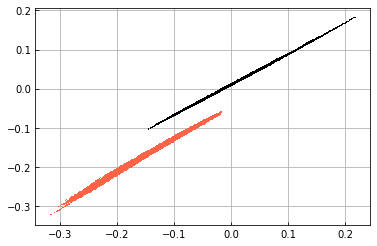

In [85]:

plot(df.ecosw2,df.ecosw3,',')
plot(df.esinw2,df.esinw3,',')
grid()

read table photodyn-samples from load_table_cache.hdf


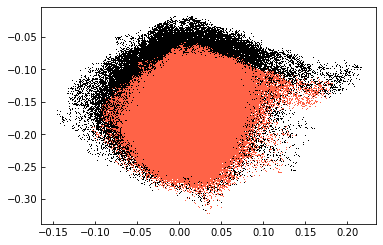

In [87]:
df = ktwo19.io.load_table('photodyn-samples',cache=1)
df = df.query('')
plot(df.ecosw2,df.esinw2,',')
plot(df.ecosw3,df.esinw3,',')


In [ ]:
sim = rebound.Simulation()
sim.t = 0
sim.G = 2.9591220363e-4 # in Msun-AU-day units
sim.integrator = "ias15" 
sim.add(m=1) # K2-19 
    

sim.add(m=0.5, P=100, e=0, omega=0, Omega=0, inc=0, T=0)
sim.add(m=m, P=, e=0, omega=0, Omega=0, inc=0, T=0)
sim.move_to_com()

